In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

df_obesity = pd.read_csv("C:\\Users\\Igor\\Documents\\GitHub\\Tech_Challenge_Fase_4_Data_Analitycs\\data\\Obesity.csv")

df_obesity.info()
df_obesity.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [229]:
df_obesity = pd.read_csv("C:\\Users\\Igor\\Documents\\GitHub\\Tech_Challenge_Fase_4_Data_Analitycs\\data\\Obesity.csv")


# Passos de exploração baixo estão descrito no Exploracao.ipynb
novos_nomes = {
    'Gender': 'Gênero',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history': 'Histórico_Familiar_Obesidade',
    'FAVC': 'Frequencia_Consumo_Alimento_Calorico',
    'FCVC': 'Frequencia_Consumo_Vegetais',
    'NCP': 'Numero_Refeicoes_Principais',
    'CAEC': 'Consumo_Alimento_Entre_Refeicoes',
    'SMOKE': 'Fumante',
    'CH2O': 'Consumo_Agua',
    'SCC': 'Monitoramento_Calorico',
    'FAF': 'Frequencia_Atividade_Fisica',
    'TUE': 'Tempo_Uso_Tecnologia',
    'CALC': 'Consumo_Alcool',
    'MTRANS': 'Meio_Transporte',
    'Obesity': 'Status_Obesidade'  
}

df_obesity = df_obesity.rename(columns=novos_nomes)

### Colunas onde ponto flutuante está incorreto, pegando o primeiro digito

colunas_primeiro_digito = [ 'Tempo_Uso_Tecnologia','Frequencia_Atividade_Fisica',
'Consumo_Agua','Numero_Refeicoes_Principais','Frequencia_Consumo_Vegetais']

for coluna in colunas_primeiro_digito:
    df_obesity[coluna] = df_obesity[coluna].astype(str).str[0]

    df_obesity[coluna] = df_obesity[coluna].astype(int)

# Coluna de idade arredondado
df_obesity['Idade'] = df_obesity['Idade'].astype(int)

#Colunas de peso e altura 2 casa decimais
df_obesity['Peso'] = df_obesity['Peso'].astype(float).round(2)
df_obesity['Altura'] = df_obesity['Altura'].astype(float).round(2)


def normalize_obesity(level):
    if level in ['Insufficient_Weight']:
        return "Abaxio do peso"
    elif level in ['Normal_Weight']:
        return "Peso normal"
    elif level in ['Overweight_Level_I', 'Overweight_Level_II']:
        return "Sobrepeso"
    else:
        return "Obeso"



df_obesity["Status_Obesidade"] = df_obesity["Status_Obesidade"].apply(normalize_obesity)



In [230]:
#Verificamos se a valores nulos para tratar
df_obesity.isna().sum()

Gênero                                  0
Idade                                   0
Altura                                  0
Peso                                    0
Histórico_Familiar_Obesidade            0
Frequencia_Consumo_Alimento_Calorico    0
Frequencia_Consumo_Vegetais             0
Numero_Refeicoes_Principais             0
Consumo_Alimento_Entre_Refeicoes        0
Fumante                                 0
Consumo_Agua                            0
Monitoramento_Calorico                  0
Frequencia_Atividade_Fisica             0
Tempo_Uso_Tecnologia                    0
Consumo_Alcool                          0
Meio_Transporte                         0
Status_Obesidade                        0
dtype: int64

In [231]:
tons_roxo_uva = [ "#9962C9", "#4B0082"]

numero_de_cores = len(contagens.index)

paleta_personalizada = list(itertools.islice(itertools.cycle(tons_roxo_uva), numero_de_cores))

df_obesity['IMC'] = (df_obesity['Peso'] / (df_obesity['Altura'] ** 2)).astype(float).round(1)

df_obesity.tail(15)


,Gênero,Idade,Altura,Peso,Histórico_Familiar_Obesidade,Frequencia_Consumo_Alimento_Calorico,Frequencia_Consumo_Vegetais,Numero_Refeicoes_Principais,Consumo_Alimento_Entre_Refeicoes,Fumante,Consumo_Agua,Monitoramento_Calorico,Frequencia_Atividade_Fisica,Tempo_Uso_Tecnologia,Consumo_Alcool,Meio_Transporte,Status_Obesidade,IMC
2096,Female,25,1.63,104.88,yes,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Obeso,39.5
2097,Female,25,1.63,105.04,yes,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Obeso,39.5
2098,Female,25,1.61,104.95,yes,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Obeso,40.5
2099,Female,25,1.63,108.09,yes,yes,3,3,Sometimes,no,1,no,0,0,Sometimes,Public_Transportation,Obeso,40.7
2100,Female,25,1.63,107.38,yes,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Obeso,40.4
2101,Female,25,1.63,107.22,yes,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Obeso,40.4
2102,Female,25,1.63,108.11,yes,yes,3,3,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Obeso,40.7
2103,Female,21,1.72,133.03,yes,yes,3,3,Sometimes,no,1,no,1,0,Sometimes,Public_Transportation,Obeso,45.0
2104,Female,21,1.73,133.04,yes,yes,3,3,Sometimes,no,1,no,1,0,Sometimes,Public_Transportation,Obeso,44.5
2105,Female,21,1.73,131.34,yes,yes,3,3,Sometimes,no,1,no,1,0,Sometimes,Public_Transportation,Obeso,43.9


### GRAFICOS DE INSIGTHS

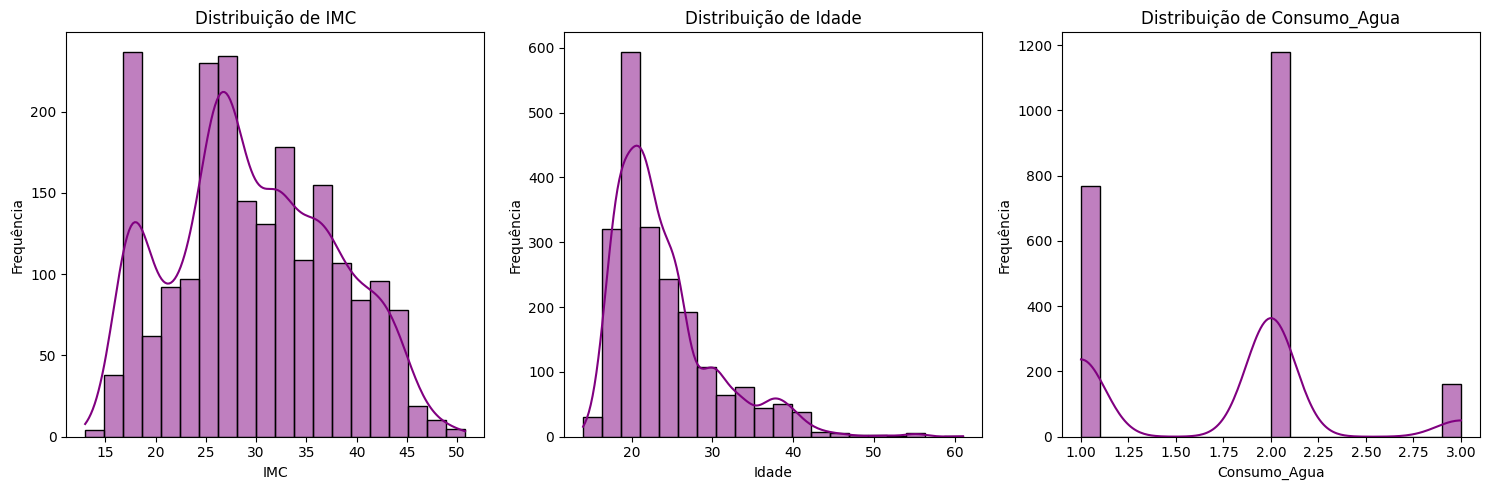

In [232]:
# (IMC, Idade, Consumo de Água)
colunas_hist = ['IMC', 'Idade', 'Consumo_Agua']
plt.figure(figsize=(15, 5))
for i, col in enumerate(colunas_hist):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_obesity[col], kde=True, bins=20, color='purple')
    plt.title(f'Distribuição de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequência', fontsize=10)
plt.tight_layout()
plt.show() 

C:\Users\Igor\AppData\Local\Temp\ipykernel_13468\2400867462.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Igor\AppData\Local\Temp\ipykernel_13468\2400867462.py:7: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


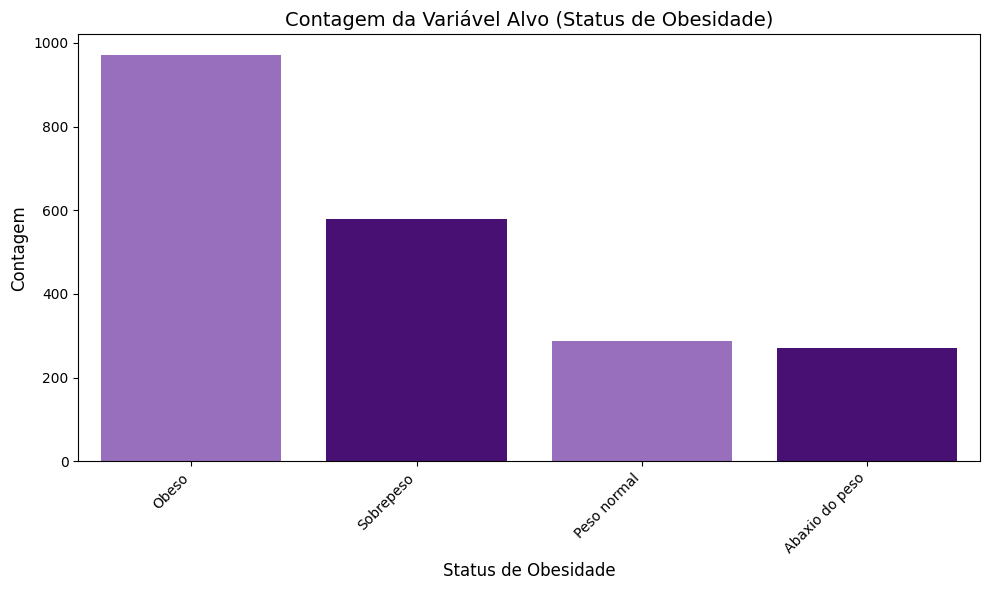

In [233]:
#Contagens da Variável Alvo 
plt.figure(figsize=(10, 6))

order = df_obesity['Status_Obesidade'].value_counts().index


sns.countplot(
    data=df_obesity, 
    x='Status_Obesidade', 
    order=order, 
    # Aplica a paleta personalizada de roxo/uva
    palette=paleta_personalizada 
)

# --- 3. CONFIGURAÇÕES DO GRÁFICO ---
plt.title('Contagem da Variável Alvo (Status de Obesidade)', fontsize=14)
plt.xlabel('Status de Obesidade', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

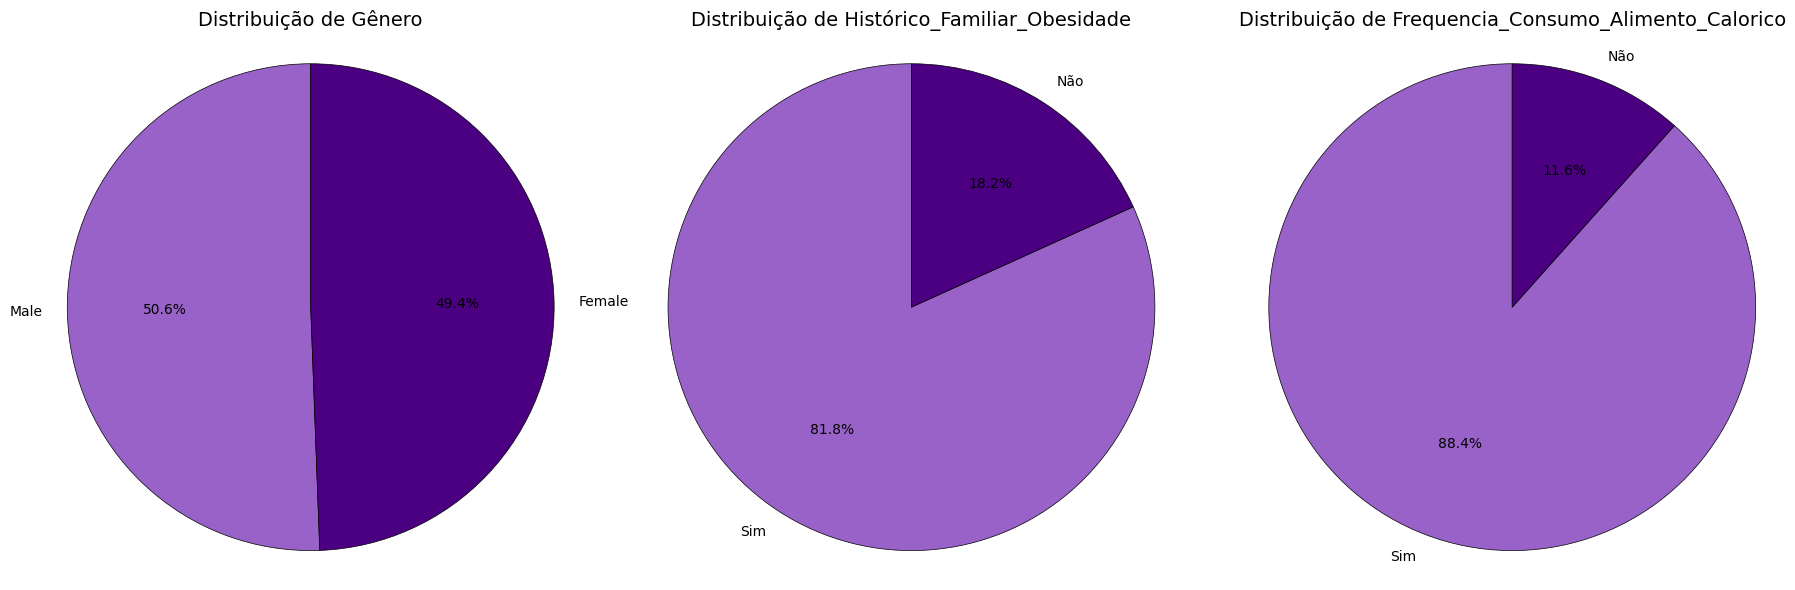

In [ ]:
# 4. Geração dos Gráficos de Pizza (Pie Charts)
colunas_pizza = [
    'Gênero',
    'Histórico_Familiar_Obesidade', 
    'Frequencia_Consumo_Alimento_Calorico', 
]


tons_roxo_uva = [ "#9962C9", "#4B0082"]



# Dicionário para mapear 0/1 (agora inteiros) para rótulos legíveis
mapeamento_rotulos = {
    "no": 'Não',
    "yes": 'Sim'
}

# Usando um layout de 1 linha e 3 colunas para os 3 gráficos
plt.figure(figsize=(18, 6))

for i, col in enumerate(colunas_pizza):
    plt.subplot(1, 3, i + 1)

    # Obter contagens de valores 
    contagens = df_obesity[col].value_counts()


    if col in ['Histórico_Familiar_Obesidade', 'Frequencia_Consumo_Alimento_Calorico']:
        
        
        labels = contagens.index.map(mapeamento_rotulos)

    else:
        
        labels = contagens.index
    
    numero_de_cores = len(contagens.index)


    paleta_personalizada = list(itertools.islice(itertools.cycle(tons_roxo_uva), numero_de_cores))


    colors = sns.color_palette(paleta_personalizada)
    
    plt.pie(
        contagens.values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors, 
        wedgeprops={"edgecolor":"black",'linewidth': 0.5}
    )
    
    plt.title(f'Distribuição de {col}', fontsize=14)
    # Garante que o gráfico de pizza seja circular
    plt.axis('equal') 

plt.tight_layout()
plt.savefig('graficos_pizza.png')


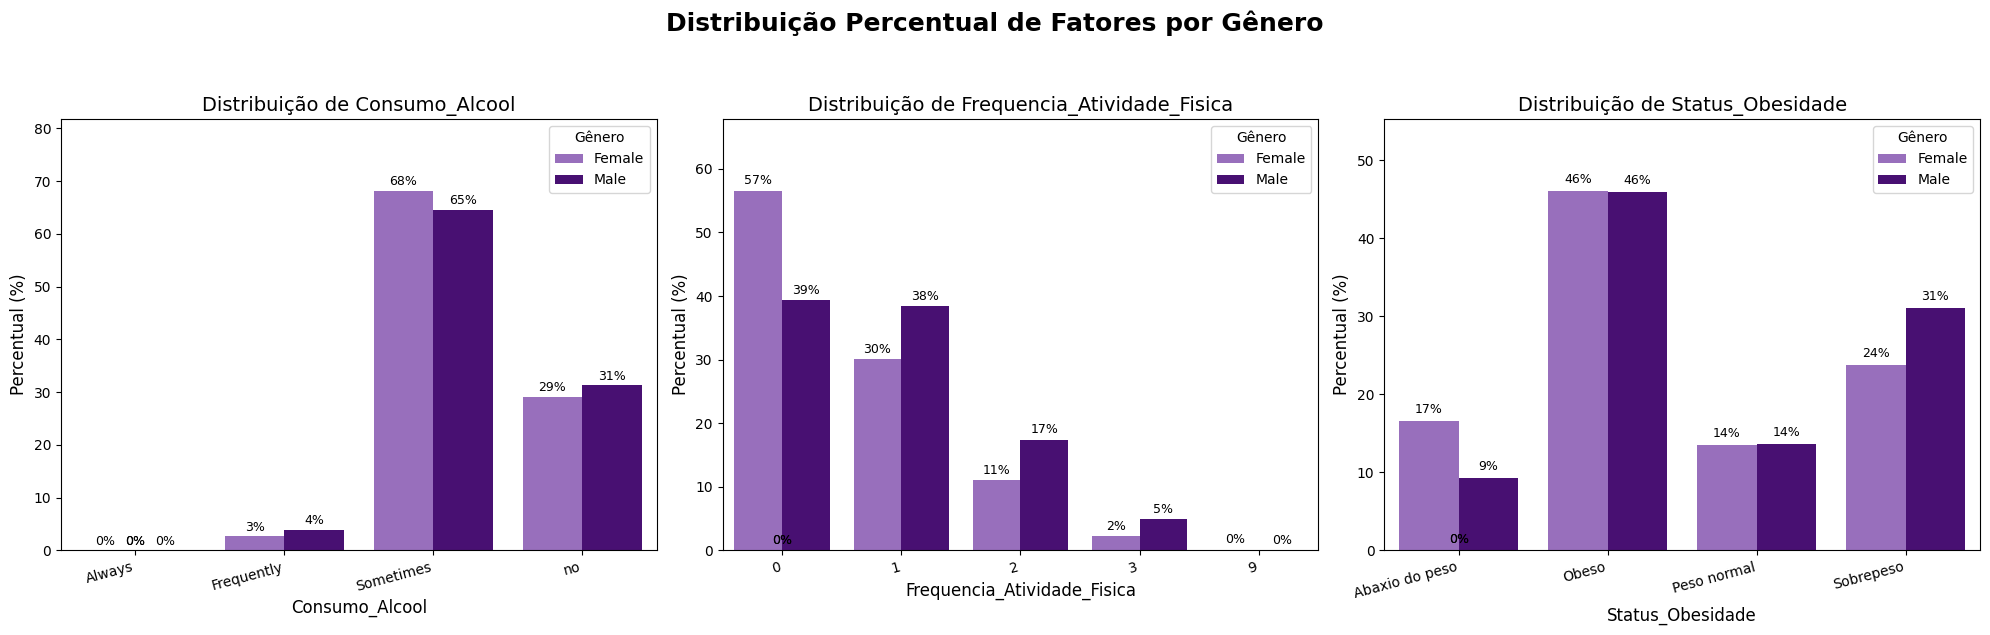

In [ ]:
# Colunas para análise de distribuição percentual por Gênero
colunas_analise = [
    'Consumo_Alcool',
    'Frequencia_Atividade_Fisica',
    'Status_Obesidade'
]

minha_paleta_roxa = ["#9962C9", "#4B0082"]


plt.figure(figsize=(20, 6))
plt.suptitle('Distribuição Percentual de Fatores por Gênero', y=1.05, fontsize=18, fontweight='bold')

for i, col in enumerate(colunas_analise):
    plt.subplot(1, 3, i + 1)
    

    tabela_percentual = pd.crosstab(
        df_obesity[col], 
        df_obesity['Gênero'], 
        normalize='columns' 
    ) * 100
    

    percentuais = tabela_percentual.stack().reset_index(name='Percentual')
    

    percentuais = percentuais.rename(columns={col: 'Categoria', 'Gênero': 'Gênero'})


    if col == 'Frequencia_Atividade_Fisica':
        percentuais['Categoria'] = percentuais['Categoria'].astype(str)


    ax = plt.gca()
    sns.barplot(
        data=percentuais,
        x='Categoria',
        y='Percentual',
        hue='Gênero',
        palette=minha_paleta_roxa,
        ax=ax
    )
    

    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.text(p.get_x() + p.get_width() / 2., 
                    height + 1,
                    f'{height:.0f}%', 
                    ha='center', 
                    fontsize=9)
    
    # Ajustar título e eixos
    plt.title(f'Distribuição de {col}', fontsize=14)
    plt.ylabel('Percentual (%)', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.ylim(0, percentuais['Percentual'].max() * 1.2)
    plt.xticks(rotation=15, ha='right')

plt.tight_layout()
plt.savefig('graficos_barras_percentual_por_genero_corrigido.png')
# plt.show()

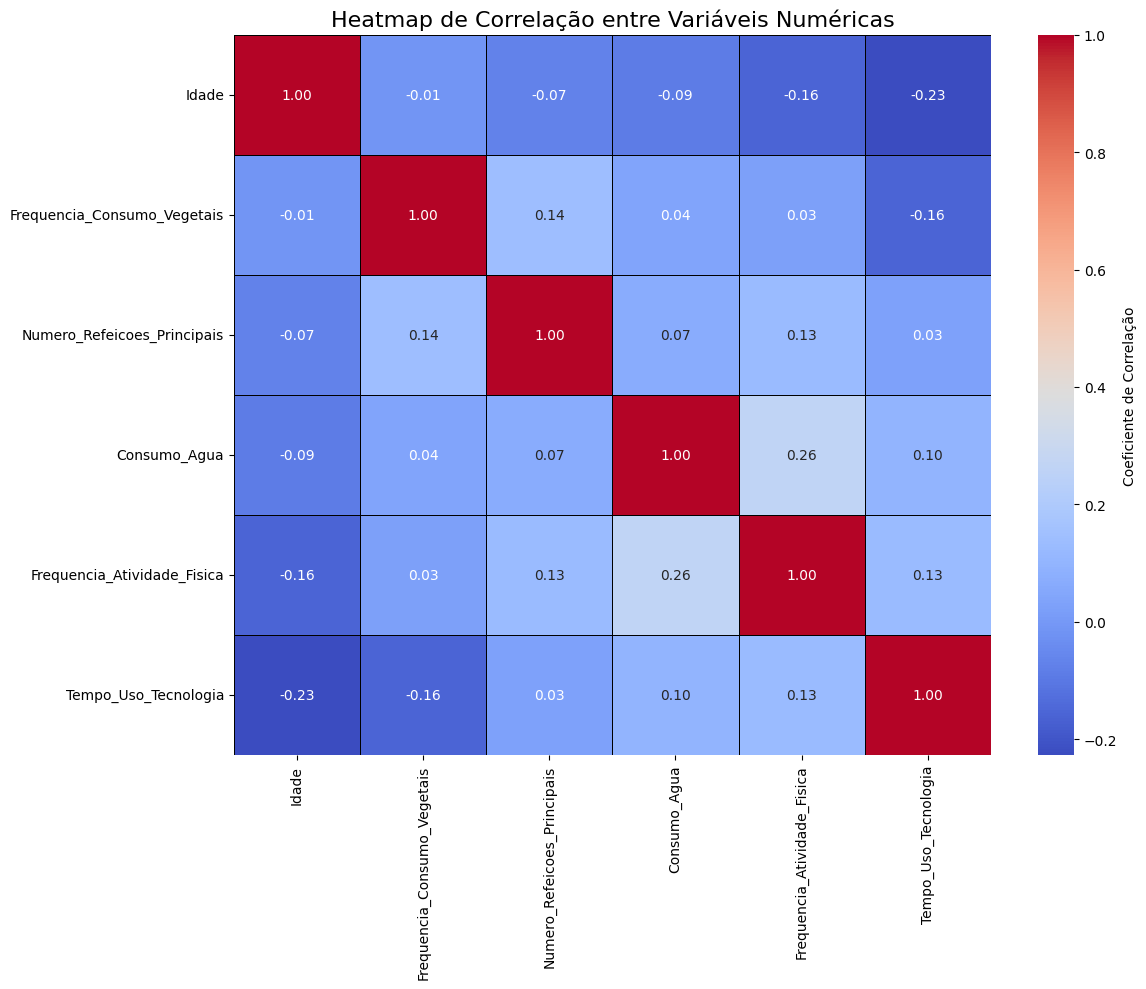

In [236]:

#  mAPA de Correlação Numérica

colunas_numericas = df_obesity.select_dtypes(include=np.number).columns
# Removido 'Altura' e 'Peso'  o IMC ja representa esses valorees

df_corr = df_obesity.select_dtypes(include=np.number)
colunas_para_remover = ['Altura', 'Peso', 'IMC']
df_corr = df_corr.drop(columns=colunas_para_remover, errors='ignore')

correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, linecolor='black', cbar_kws={'label': 'Coeficiente de Correlação'})
plt.title('Heatmap de Correlação entre Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show() 



